In [120]:
## Load liberaries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split


In [121]:
## load our data

df = pd.read_csv('BS 6X.csv')

In [122]:
df 

,DEPT,CALI,DEPTH,DT,DTMAA,GR,IDPH,ILD,IMPH,LITH_A,...,LITH_P,NPHI,PEF,PHIE_ND,PHIT_ND,PHIT_ND_UNCL,PHIT_NS,RHOB,RHOMAA,VSH_GR
0,3143.5,2.3828,3143.5,64.300003,29.07533,21.942801,1950.0000,1950.0000,10.8051,1.725836,...,0.003451,0.5696,111.087997,0.529355,0.569147,0.569147,0.220258,1.7428,2.724021,0.132698
1,3144.0,2.3813,3144.0,64.300003,28.06271,21.949200,1950.0000,1950.0000,10.8051,1.817915,...,0.003277,0.5914,111.087997,0.546353,0.586166,0.586166,0.225164,1.7428,2.794921,0.132769
2,3144.5,2.3831,3144.5,64.300003,29.66816,21.941099,1950.0000,1950.0000,10.8051,1.675615,...,0.003555,0.5567,166.132706,0.523044,0.562830,0.562830,0.217357,1.7428,2.699109,0.132679
3,3145.0,2.3813,3145.0,64.300003,30.18812,19.672800,1950.0000,1950.0000,10.8051,1.609853,...,0.003646,0.5453,212.836197,0.531384,0.563612,0.563612,0.214794,1.7320,2.677407,0.107476
4,3145.5,2.3831,3145.5,64.300003,31.45411,20.483200,1950.0000,1950.0000,10.8051,1.557995,...,0.003872,0.5172,126.736198,0.511783,0.546712,0.546712,0.208485,1.7522,2.659431,0.116480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8786,7536.5,2.3194,7536.5,65.800003,44.80771,112.848702,4.7003,4.7232,4.9981,1.800523,...,0.006515,0.1974,3.590500,0.000000,0.176196,0.176196,0.145585,2.4451,2.754180,1.000000
8787,7537.0,2.3194,7537.0,65.800003,44.80771,112.848702,4.7026,4.7232,5.0008,1.800523,...,0.006515,0.1974,3.590500,0.000000,0.176196,0.176196,0.145585,2.4451,2.754180,1.000000
8788,7537.5,2.3194,7537.5,65.800003,44.80771,112.848702,4.7050,4.7232,5.0024,1.800523,...,0.006515,0.1974,3.590500,0.000000,0.176196,0.176196,0.145585,2.4451,2.754180,1.000000
8789,7538.0,2.3194,7538.0,65.800003,44.80771,112.848702,4.7076,4.7232,5.0023,1.800523,...,0.006515,0.1974,3.590500,0.000000,0.176196,0.176196,0.145585,2.4451,2.754180,1.000000


In [132]:
df.head()

,DEPTH,DT,GR,IDPH,ILD,IMPH,NPHI,RHOB
0,3143.5,64.300003,21.942801,1950.0,1950.0,10.8051,0.5696,1.7428
1,3144.0,64.300003,21.949200,1950.0,1950.0,10.8051,0.5914,1.7428
2,3144.5,64.300003,21.941099,1950.0,1950.0,10.8051,0.5567,1.7428
3,3145.0,64.300003,19.672800,1950.0,1950.0,10.8051,0.5453,1.7320
4,3145.5,64.300003,20.483200,1950.0,1950.0,10.8051,0.5172,1.7522


My target is to predict sonic log outputs from another logs 

In [123]:
df.columns

Index(['DEPT', 'CALI', 'DEPTH', 'DT', 'DTMAA', 'GR', 'IDPH', 'ILD', 'IMPH',
       'LITH_A', 'LITH_K', 'LITH_M', 'LITH_N', 'LITH_P', 'NPHI', 'PEF',
       'PHIE_ND', 'PHIT_ND', 'PHIT_ND_UNCL', 'PHIT_NS', 'RHOB', 'RHOMAA',
       'VSH_GR'],
      dtype='object')

In [124]:
## Check for any na values

In [125]:
df.isnull().sum()

DEPT            0
CALI            0
DEPTH           0
DT              0
DTMAA           0
GR              0
IDPH            0
ILD             0
IMPH            0
LITH_A          0
LITH_K          0
LITH_M          0
LITH_N          0
LITH_P          0
NPHI            0
PEF             0
PHIE_ND         0
PHIT_ND         0
PHIT_ND_UNCL    0
PHIT_NS         0
RHOB            0
RHOMAA          0
VSH_GR          0
dtype: int64

In [126]:
df = df.drop(columns=['DEPT','VSH_GR','CALI','DTMAA','LITH_A','LITH_K','LITH_M','LITH_N','LITH_P','PHIT_NS','PHIT_ND_UNCL','PHIT_ND','PHIE_ND','RHOMAA','PEF'])

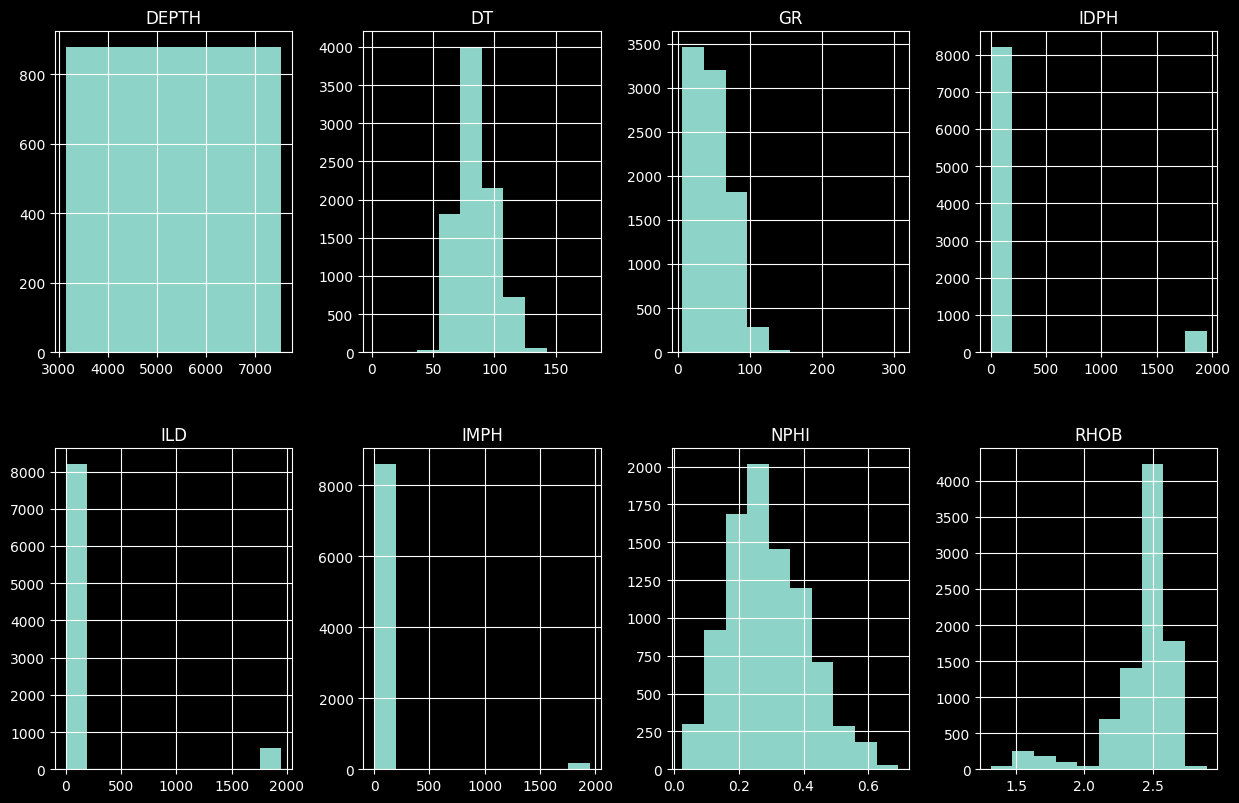

In [127]:
## Histograms For The Whole Data

df.hist(bins=10,figsize=(15, 15), layout=(3, 4))
plt.show()

<AxesSubplot:>

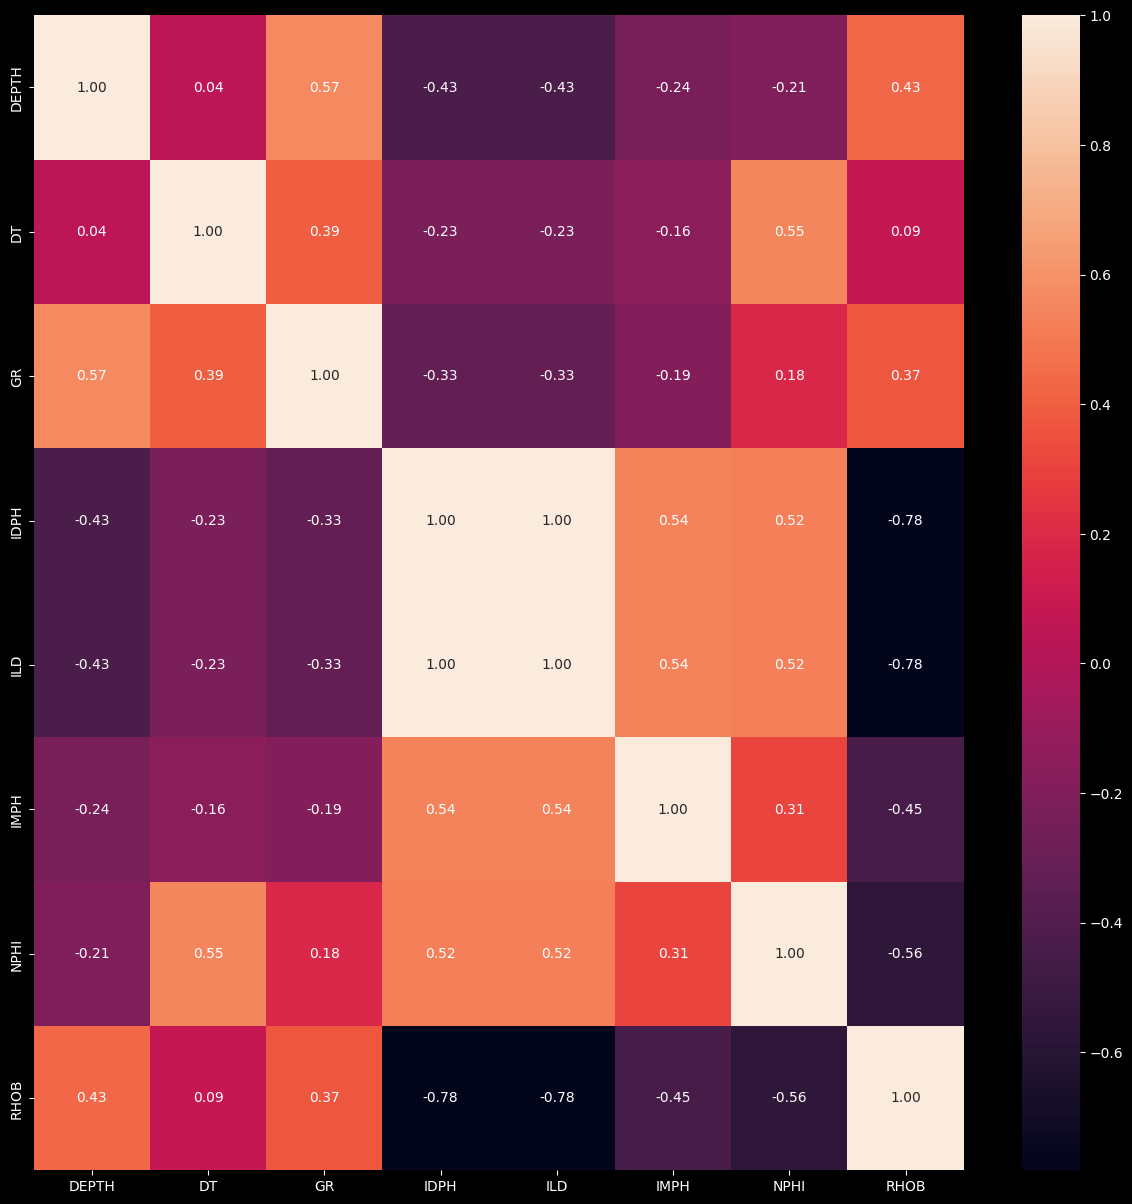

In [128]:
## Create heatmap to understand how the variables correlate to each other
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr(),annot=True, fmt='0.2f', ax=ax)

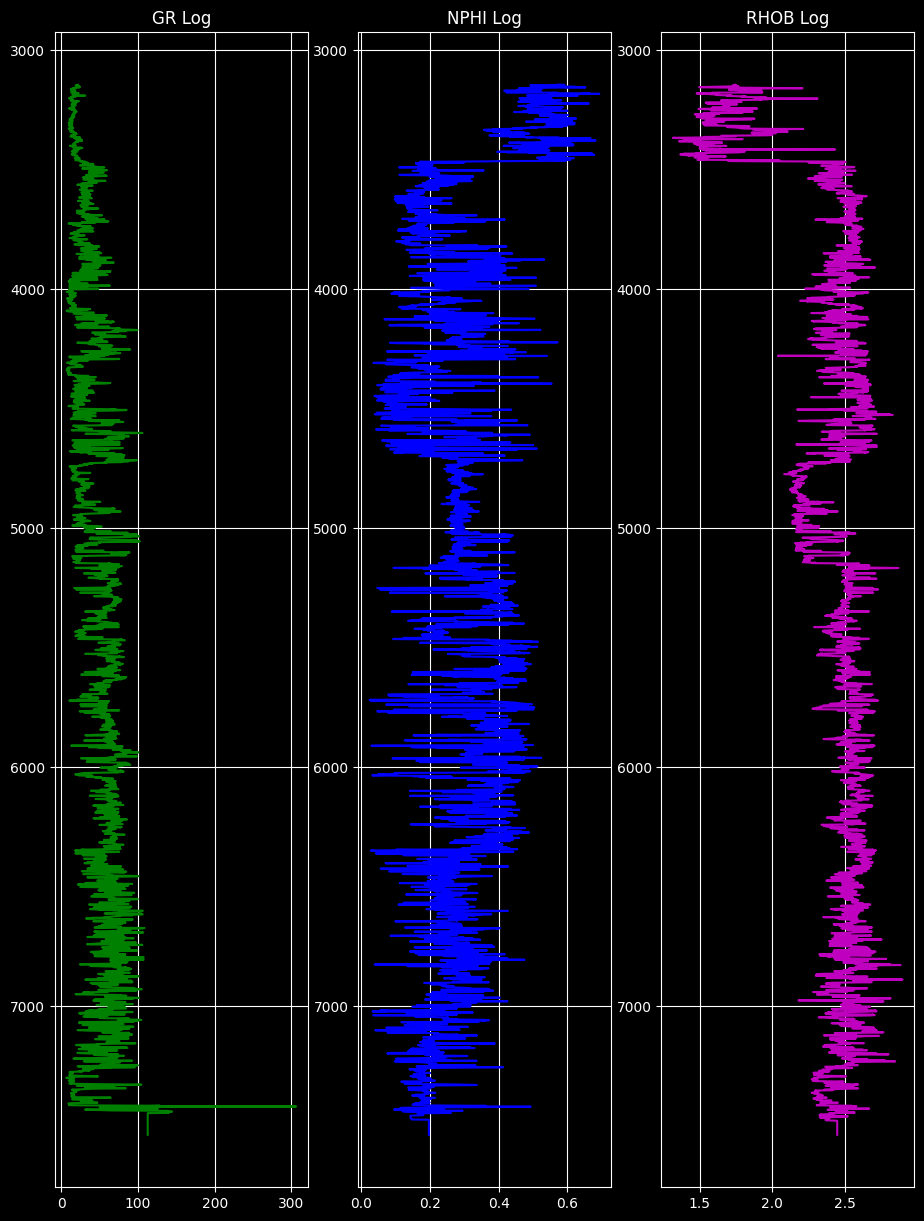

In [129]:
## Explore how the independent Variables are distributed
fig=plt.subplots(figsize=(15,15))
ax1=plt.subplot2grid((3,4), (0,0), rowspan=4,colspan=1)
ax2=plt.subplot2grid((3,4), (0,1), rowspan=4,colspan=1)
ax3=plt.subplot2grid((3,4), (0,2), rowspan=4,colspan=1)

#GR
ax1.plot('GR','DEPTH', data= df, color='green')
ax1.set_title('GR Log')
ax1.grid()
ax1.invert_yaxis()

# nphi
ax2.plot('NPHI','DEPTH', data= df, color='blue')
ax2.invert_yaxis()
ax2.set_title('NPHI Log')
ax2.grid()

# RHOB
ax3.plot('RHOB','DEPTH', data= df, color='m')
ax3.invert_yaxis()
ax3.set_title('RHOB Log')
ax3.grid()


In [130]:
## check data type
df.dtypes

DEPTH    float64
DT       float64
GR       float64
IDPH     float64
ILD      float64
IMPH     float64
NPHI     float64
RHOB     float64
dtype: object

In [133]:
to_norm= ['GR','NPHI','IDPH','ILD','IMPH','RHOB']
from sklearn.preprocessing import StandardScaler
scale= StandardScaler()
scale.fit(df[to_norm])
new= scale.transform(df[to_norm])
new_df = pd.DataFrame(new,columns= to_norm)


In [134]:
new_df.head()

,GR,NPHI,IDPH,ILD,IMPH,RHOB
0,-1.021481,2.348600,3.772501,3.765804,-0.116672,-2.737293
1,-1.021232,2.530291,3.772501,3.765804,-0.116672,-2.737293
2,-1.021547,2.241086,3.772501,3.765804,-0.116672,-2.737293
3,-1.109882,2.146074,3.772501,3.765804,-0.116672,-2.780648
4,-1.078322,1.911877,3.772501,3.765804,-0.116672,-2.699558


In [139]:
## Concatenate 
rest= ['DEPTH','DT']
rest_df= df[rest]
final= [rest_df,new_df]
final_df= pd.concat(final,axis=1)

In [140]:
final_df.columns

Index(['DEPTH', 'DT', 'GR', 'NPHI', 'IDPH', 'ILD', 'IMPH', 'RHOB'], dtype='object')

In [141]:
final_df= final_df[['DEPTH', 'DT', 'GR', 'NPHI', 'IDPH', 'ILD', 'IMPH', 'RHOB']]

In [142]:
final_df.head()

,DEPTH,DT,GR,NPHI,IDPH,ILD,IMPH,RHOB
0,3143.5,64.300003,-1.021481,2.348600,3.772501,3.765804,-0.116672,-2.737293
1,3144.0,64.300003,-1.021232,2.530291,3.772501,3.765804,-0.116672,-2.737293
2,3144.5,64.300003,-1.021547,2.241086,3.772501,3.765804,-0.116672,-2.737293
3,3145.0,64.300003,-1.109882,2.146074,3.772501,3.765804,-0.116672,-2.780648
4,3145.5,64.300003,-1.078322,1.911877,3.772501,3.765804,-0.116672,-2.699558


<AxesSubplot:xlabel='NPHI', ylabel='RHOB'>

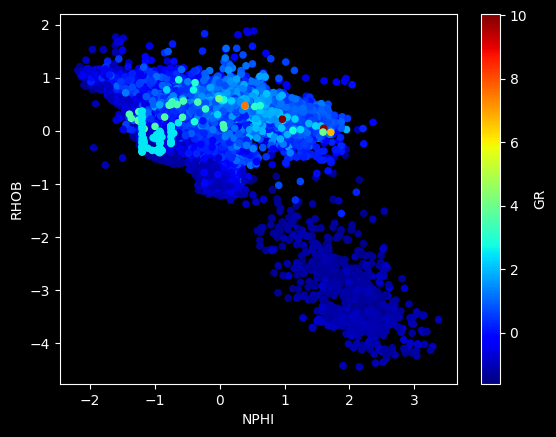

In [143]:
final_df.plot(kind='scatter',x='NPHI',y='RHOB' , c='GR', colormap='jet')

<AxesSubplot:xlabel='DT', ylabel='RHOB'>

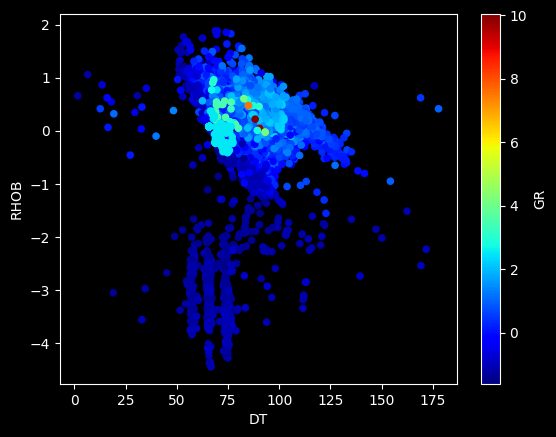

In [144]:
final_df.plot(kind='scatter',x='DT',y='RHOB' , c='GR', colormap='jet')

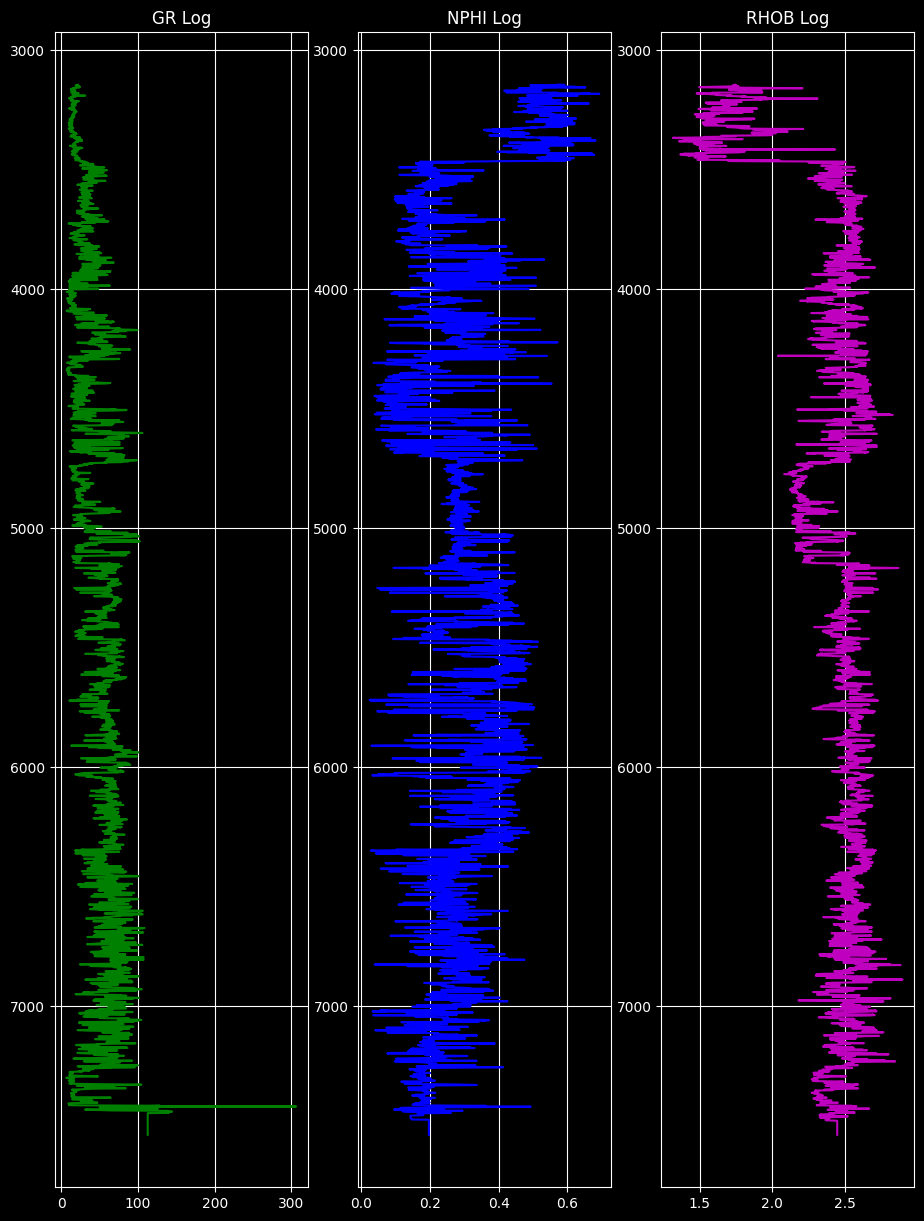

In [145]:
## Explore how the independent Variables are distributed
fig=plt.subplots(figsize=(15,15))
ax1=plt.subplot2grid((3,4), (0,0), rowspan=4,colspan=1)
ax2=plt.subplot2grid((3,4), (0,1), rowspan=4,colspan=1)
ax3=plt.subplot2grid((3,4), (0,2), rowspan=4,colspan=1)

#GR
ax1.plot('GR','DEPTH', data= df, color='green')
ax1.set_title('GR Log')
ax1.grid()
ax1.invert_yaxis()

# nphi
ax2.plot('NPHI','DEPTH', data= df, color='blue')
ax2.invert_yaxis()
ax2.set_title('NPHI Log')
ax2.grid()

# RHOB
ax3.plot('RHOB','DEPTH', data= df, color='m')
ax3.invert_yaxis()
ax3.set_title('RHOB Log')
ax3.grid()

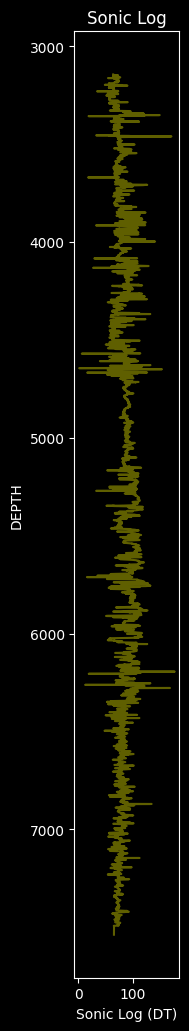

In [146]:
# Visualize how DT (dependent variable) is distriuted

fig= plt.figure(figsize= (3,10))
ax6= fig.add_subplot(121)
ax6.plot(df["DT"], df["DEPTH"], color = 'y', alpha=0.5)
plt.tight_layout()
ax6.invert_yaxis()
plt.xlabel('Sonic Log (DT)')
plt.ylabel('DEPTH')
plt.title('Sonic Log')
plt.show()

In [147]:
## smoothing log
lst = list(df)
logs = df.copy(deep=True)
window = 17
for i in lst:
    logs[i] = pd.Series(logs[i]).rolling(window=window, min_periods=1).mean()

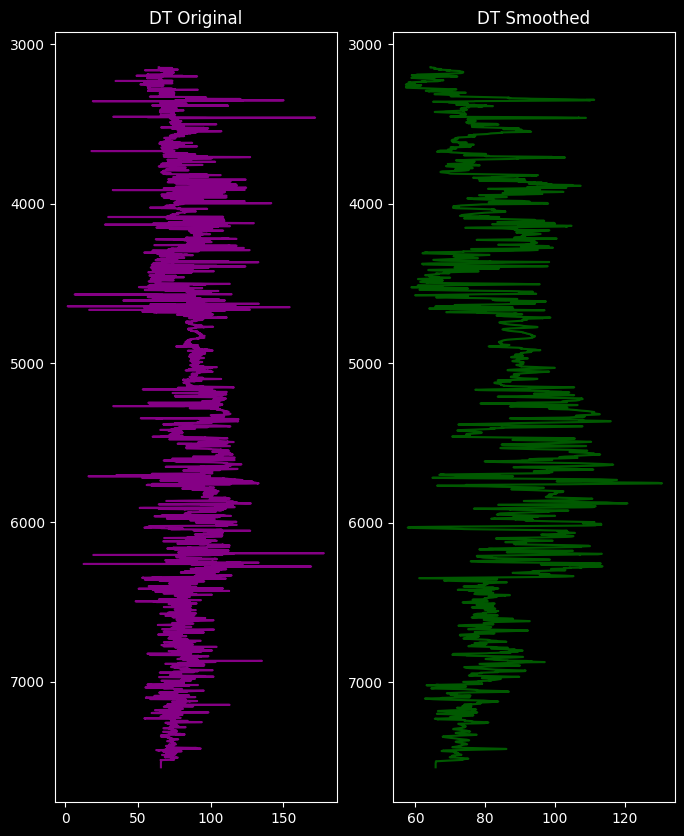

In [148]:
fig = plt.figure(figsize=(8,10))
ax1 = fig.add_subplot(121)
plt.title('DT Original')
plt.style.use(['dark_background'])
ax1.plot( df["DT"], df["DEPTH"],'m', alpha=0.7)
plt.gca().invert_yaxis()
ax2 = fig.add_subplot(122)
plt.title('DT Smoothed')
ax2.plot( logs["DT"], logs["DEPTH"],'green', alpha=0.7)
plt.gca().invert_yaxis()
plt.show()

Let's predict Sonic log

In [149]:
## Define X &Y     
X= final_df.drop(['DT'],axis=1) #Independent var
Y= final_df['DT'] #Dependent var



In [150]:
## split the data into training ( 80%) and testing set (20%)
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size= 0.2, random_state = 32)

In [151]:
print(X_train.shape,X_test.shape)

(7032, 7) (1759, 7)


In [152]:
## MODELING
# Import the linear regression class
from sklearn.linear_model import LinearRegression


# Initialize our algorithm class
LR = LinearRegression()
LR.fit(X_train, Y_train)

LinearRegression()

In [153]:
pred_LR = LR.predict(X_test)

In [154]:
## create a data frame for predictions
pd.DataFrame({'Actual' : Y_test, 'Predicted': pred_LR})

,Actual,Predicted
7020,82.000000,82.278310
8037,71.400002,71.016694
7162,74.150002,76.458252
6730,84.900002,80.374761
2463,61.000000,66.102473
...,...,...
5459,112.599998,107.147070
3772,101.099998,106.918840
7689,80.500000,86.938458
2011,63.200001,67.600920


In [155]:
### MAE
### MSE
### RMSE
### R2
from sklearn import metrics
from sklearn.metrics import confusion_matrix

print('MAE:', metrics.mean_absolute_error(Y_test, pred_LR))
print('MSE:', metrics.mean_squared_error(Y_test, pred_LR))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, pred_LR)))
print('R2:', metrics.r2_score(Y_test, pred_LR)) 

MAE: 5.25677626385775
MSE: 57.43220868845532
RMSE: 7.578404099047194
R2: 0.7472840384836723


In [156]:
## LASSO REGRESSION
from sklearn.linear_model import Lasso
model_lasso = Lasso(alpha= 0.2)
model_lasso.fit(X_train, Y_train)

Lasso(alpha=0.2)

In [157]:
pred_lasso = model_lasso.predict(X_test)
pd.DataFrame({'Actual': Y_test, 'predicted': pred_lasso})

,Actual,predicted
7020,82.000000,82.385600
8037,71.400002,71.603221
7162,74.150002,76.782231
6730,84.900002,80.618288
2463,61.000000,66.478040
...,...,...
5459,112.599998,106.305860
3772,101.099998,106.117160
7689,80.500000,86.896801
2011,63.200001,67.884691


In [158]:
print('MAE:', metrics.mean_absolute_error(Y_test, pred_lasso))
print('MSE:', metrics.mean_squared_error(Y_test, pred_lasso))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, pred_lasso)))
print('R2:', metrics.r2_score(Y_test, pred_lasso))

MAE: 5.278014285884271
MSE: 57.6604217348808
RMSE: 7.593445972342254
R2: 0.7462798444821698


In [159]:
## Random forest regression
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators= 100, random_state= 32)
rf_reg.fit(X_train, Y_train)

RandomForestRegressor(random_state=32)

In [160]:
rf_reg_pred = rf_reg.predict(X_test)

In [161]:
pd.DataFrame({'Actual': Y_test, 'predicted': rf_reg_pred})

,Actual,predicted
7020,82.000000,80.565501
8037,71.400002,72.444666
7162,74.150002,73.545001
6730,84.900002,82.635500
2463,61.000000,61.546000
...,...,...
5459,112.599998,110.689500
3772,101.099998,100.867501
7689,80.500000,82.089999
2011,63.200001,64.219000


In [162]:
print('MAE:', metrics.mean_absolute_error(Y_test, rf_reg_pred))
print('MSE:', metrics.mean_squared_error(Y_test, rf_reg_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, rf_reg_pred)))
print('R2:', metrics.r2_score(Y_test, rf_reg_pred))

MAE: 2.2419019364389663
MSE: 15.822862369070116
RMSE: 3.9777961698747353
R2: 0.9303754814788472


In [163]:
##POLYNOMIAL REGRESSION
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_train_2 = poly_reg.fit_transform(X_train)
X_test_2 = poly_reg.transform(X_test)

mul_reg = LinearRegression()
mul_reg.fit(X_train_2, Y_train)

LinearRegression()

In [164]:
mul_pred = mul_reg.predict(X_test_2)
pd.DataFrame({'Actual': Y_test, 'predicted':mul_pred})

,Actual,predicted
7020,82.000000,83.178437
8037,71.400002,74.143748
7162,74.150002,76.808144
6730,84.900002,83.678299
2463,61.000000,64.284354
...,...,...
5459,112.599998,109.334500
3772,101.099998,108.226151
7689,80.500000,86.511469
2011,63.200001,60.936908


In [165]:
print('MAE:', metrics.mean_absolute_error(Y_test, mul_pred))
print('MSE:', metrics.mean_squared_error(Y_test, mul_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, mul_pred)))
print('R2:', metrics.r2_score(Y_test, mul_pred))

MAE: 4.057721239157396
MSE: 32.64098430317997
RMSE: 5.7132288859435665
R2: 0.8563715740454253


In [166]:
# ridge regression
from sklearn.linear_model import Ridge
model_ridge = Ridge(alpha = 0.99, random_state = 32)
model_ridge.fit(X_train, Y_train)

Ridge(alpha=0.99, random_state=32)

In [167]:
pred_ridge = model_ridge.predict(X_test)
pd.DataFrame({'Actual': Y_test, 'predicted': pred_ridge})

,Actual,predicted
7020,82.000000,82.279551
8037,71.400002,71.015676
7162,74.150002,76.461144
6730,84.900002,80.376556
2463,61.000000,66.108043
...,...,...
5459,112.599998,107.139855
3772,101.099998,106.915151
7689,80.500000,86.937067
2011,63.200001,67.607479


In [168]:
print('MAE:', metrics.mean_absolute_error(Y_test, pred_ridge))
print('MSE:', metrics.mean_squared_error(Y_test, pred_ridge))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, pred_ridge)))
print('R2:', metrics.r2_score(Y_test, pred_ridge))

MAE: 5.257618085902582
MSE: 57.43771307649918
RMSE: 7.578767253089329
R2: 0.7472598178111816


In [169]:
# create baseline model.

baseline = np.full(df["DT"].shape, df["DT"].mean()) 
print (baseline.shape)
print (baseline [:5])

(8791,)
[84.14838571 84.14838571 84.14838571 84.14838571 84.14838571]


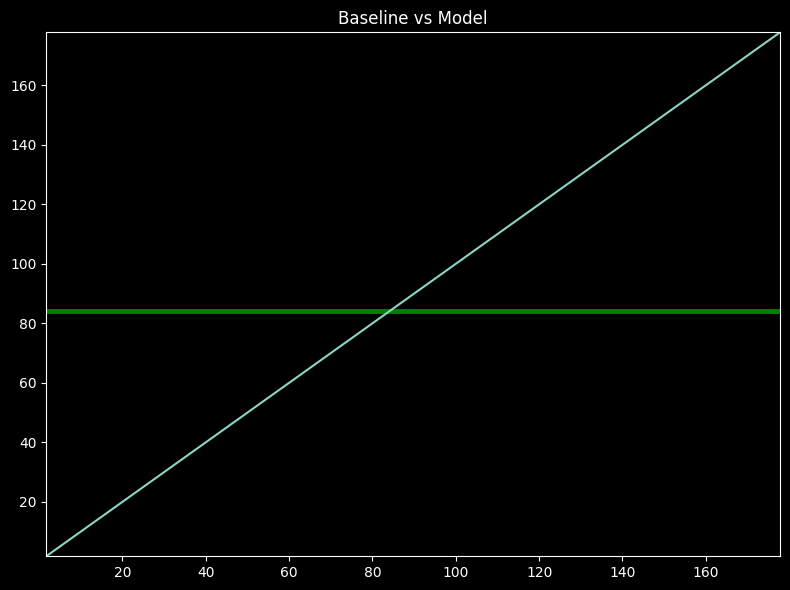

In [170]:
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111)
plt.style.use(['dark_background'])
plt.title('Baseline vs Model')
ax1.scatter(np.linspace(df["DT"].min(), df["DT"].max(), df["DT"].shape[0]), 
            baseline, s=3, color = 'g', alpha=0.5)

ax1.plot(np.linspace(df["DT"].min(), df["DT"].max(), df["DT"].shape[0]), 
         np.linspace(df["DT"].min(), df["DT"].max(), df["DT"].shape[0]))

ax1.set_xlim([df["DT"].min(), df["DT"].max()  ])
ax1.set_ylim([df["DT"].min(), df["DT"].max() ])

plt.tight_layout()
plt.show()

The diagonal line represents the correct values and the scatter points represents out predictions

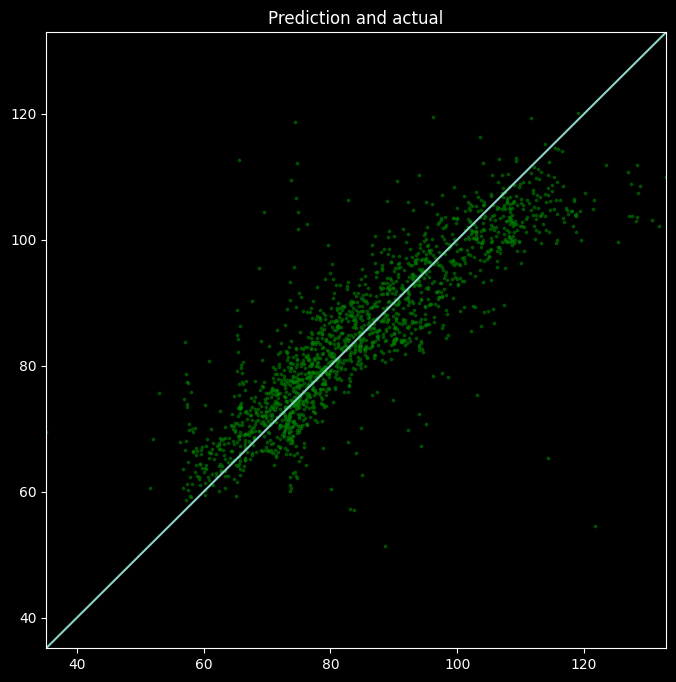

In [171]:
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(111)
plt.style.use(['dark_background'])

ax1.scatter(Y_test,pred_LR, s=3, color = 'g', alpha=0.5)
plt.title('Prediction and actual')
ax1.plot(np.linspace(Y_test.min(), Y_test.max(), Y_test.shape[0]), 
         np.linspace(Y_test.min(), Y_test.max(), Y_test.shape[0]))

ax1.set_xlim(Y_test.min() , Y_test.max()  )
ax1.set_ylim(Y_test.min() , Y_test.max() )

plt.show()

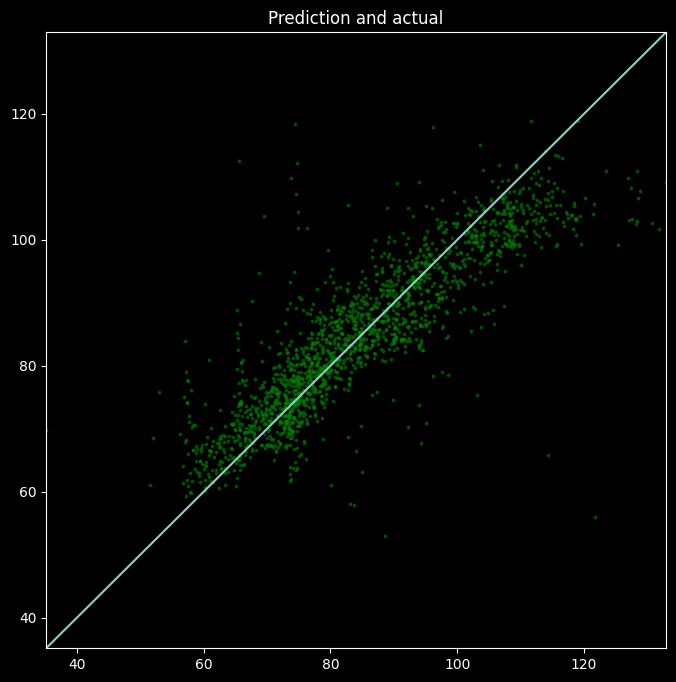

In [ ]:
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(111)
plt.style.use(['dark_background'])

ax1.scatter(Y_test,pred_lasso, s=3, color = 'g', alpha=0.5)
plt.title('Prediction and actual')
ax1.plot(np.linspace(Y_test.min(), Y_test.max(), Y_test.shape[0]), 
         np.linspace(Y_test.min(), Y_test.max(), Y_test.shape[0]))

ax1.set_xlim(Y_test.min() , Y_test.max()  )
ax1.set_ylim(Y_test.min() , Y_test.max() )

plt.show()

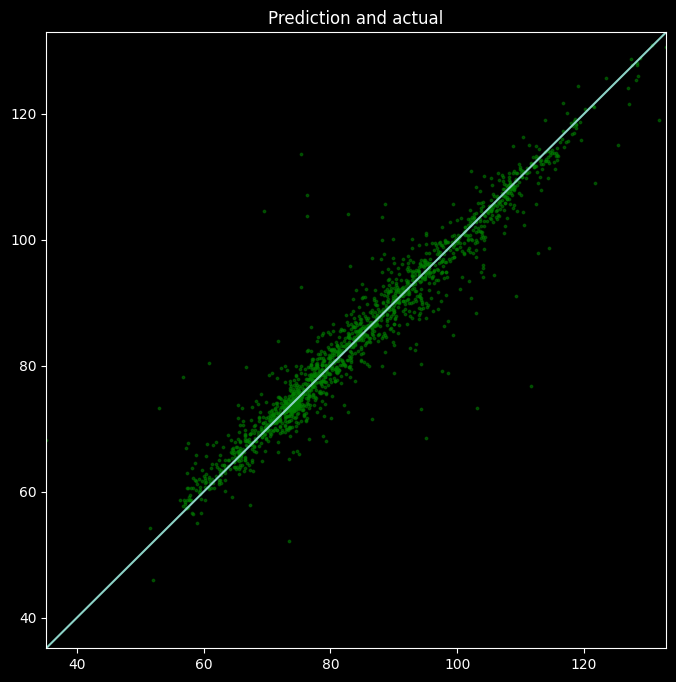

In [172]:
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(111)
plt.style.use(['dark_background'])

ax1.scatter(Y_test,rf_reg_pred, s=3, color = 'g', alpha=0.5)
plt.title('Prediction and actual')
ax1.plot(np.linspace(Y_test.min(), Y_test.max(), Y_test.shape[0]), 
         np.linspace(Y_test.min(), Y_test.max(), Y_test.shape[0]))

ax1.set_xlim(Y_test.min() , Y_test.max()  )
ax1.set_ylim(Y_test.min() , Y_test.max() )

plt.show()

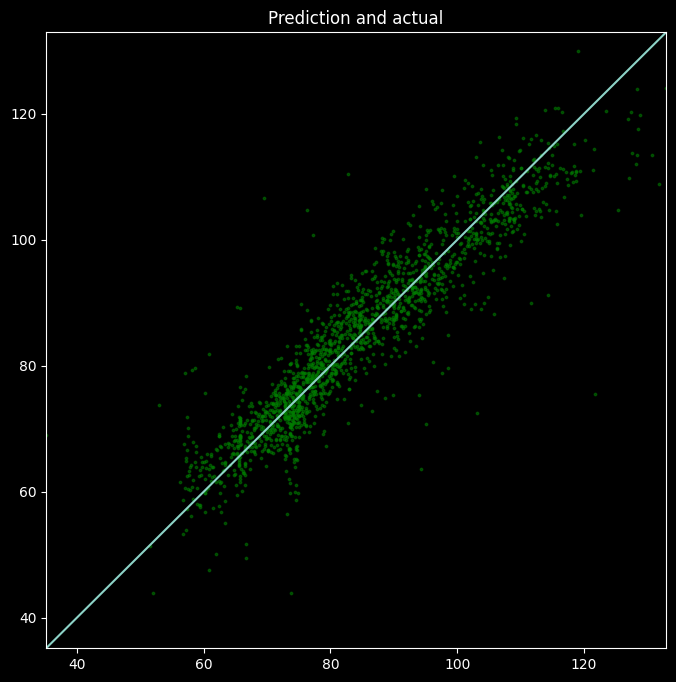

In [173]:
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(111)
plt.style.use(['dark_background'])

ax1.scatter(Y_test,mul_pred, s=3, color = 'g', alpha=0.5)
plt.title('Prediction and actual')
ax1.plot(np.linspace(Y_test.min(), Y_test.max(), Y_test.shape[0]), 
         np.linspace(Y_test.min(), Y_test.max(), Y_test.shape[0]))

ax1.set_xlim(Y_test.min() , Y_test.max()  )
ax1.set_ylim(Y_test.min() , Y_test.max() )

plt.show()

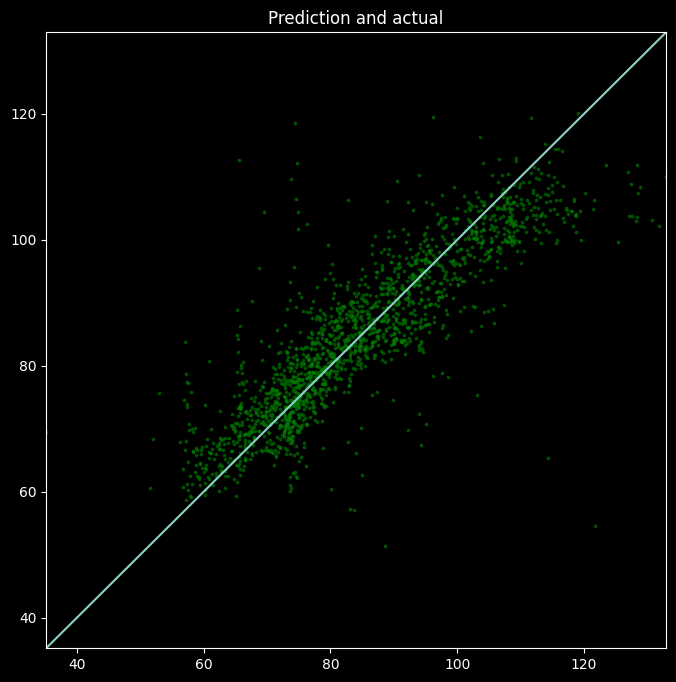

In [174]:
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(111)
plt.style.use(['dark_background'])

ax1.scatter(Y_test,pred_ridge, s=3, color = 'g', alpha=0.5)
plt.title('Prediction and actual')
ax1.plot(np.linspace(Y_test.min(), Y_test.max(), Y_test.shape[0]), 
         np.linspace(Y_test.min(), Y_test.max(), Y_test.shape[0]))

ax1.set_xlim(Y_test.min() , Y_test.max()  )
ax1.set_ylim(Y_test.min() , Y_test.max() )

plt.show()

In [175]:
X_test

,DEPTH,GR,NPHI,IDPH,ILD,IMPH,RHOB
7020,6653.5,0.702359,-0.249238,-0.265645,-0.266172,-0.148465,0.322832
8037,7162.0,-0.992535,-0.865985,-0.267505,-0.268190,-0.151289,-0.146043
7162,6724.5,0.599787,-0.629287,-0.262577,-0.263077,-0.142056,0.288709
6730,6508.5,0.847593,-0.347584,-0.266544,-0.267112,-0.149891,0.051062
2463,4375.0,-1.019861,-1.606914,-0.256700,-0.256822,-0.133313,0.711820
...,...,...,...,...,...,...,...
5459,5873.0,0.512851,1.367639,-0.268710,-0.269188,-0.153590,0.344911
3772,5029.5,1.554191,1.284295,-0.266398,-0.266652,-0.149752,0.210430
7689,6988.0,0.475309,0.109142,-0.264538,-0.265062,-0.146775,0.292724
2011,4149.0,-1.169465,-1.540239,-0.259555,-0.257320,-0.131416,0.803749


In [176]:
##Adding our Predicted log to DataFrame
X_test["Predicted DT"] = rf_reg_pred
X_test["Actual DT"] = rf_reg_pred
df_X_test = X_test.sort_values(by ='DEPTH', ascending=[True])


In [177]:
df_X_test

,DEPTH,GR,NPHI,IDPH,ILD,IMPH,RHOB,Predicted DT,Actual DT
8,3147.5,-1.140717,2.008556,3.772501,3.765804,-0.116672,-2.779845,65.834502,65.834502
11,3149.0,-1.020800,1.899375,3.772501,3.765804,-0.116672,-2.661823,65.486999,65.486999
16,3151.5,-0.939794,2.701146,3.772501,3.765804,-0.116672,-3.294482,65.261998,65.261998
20,3153.5,-0.932496,2.825329,3.772501,3.765804,-0.116672,-3.724016,65.303499,65.303499
22,3154.5,-0.943365,3.039523,3.772501,3.765804,-0.116672,-3.412102,65.291499,65.291499
...,...,...,...,...,...,...,...,...,...
8766,7526.5,2.518669,-0.753470,-0.260414,-0.260868,-0.137740,0.081972,65.800003,65.800003
8767,7527.0,2.518669,-0.753470,-0.260422,-0.260858,-0.138112,0.081972,65.800003,65.800003
8768,7527.5,2.518669,-0.753470,-0.260423,-0.260843,-0.138337,0.081972,65.800003,65.800003
8782,7534.5,2.518669,-0.753470,-0.260412,-0.260833,-0.138034,0.081972,65.800003,65.800003


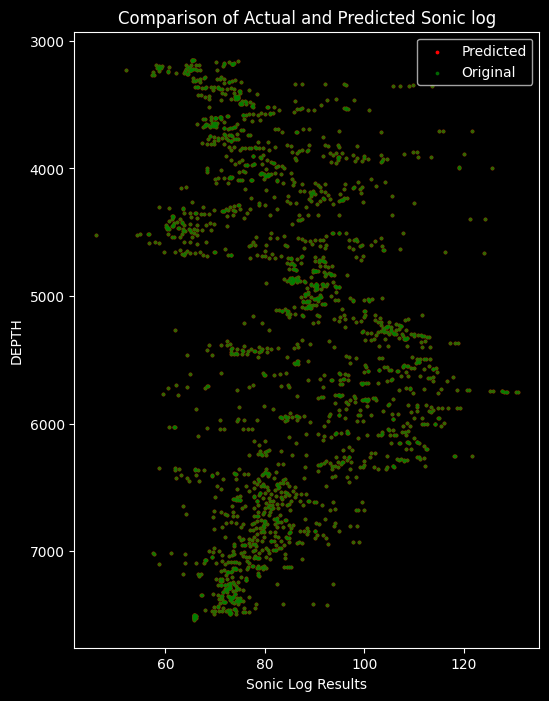

In [178]:
## Plot the result
fig = plt.figure(figsize=(6,8))
ax1 = fig.add_subplot(111)
plt.title('Comparison of Actual and Predicted Sonic log')
ax1.scatter(df_X_test['Predicted DT'], df_X_test['DEPTH'], s = 3, color = 'red', label='Predicted')
ax1.scatter(df_X_test['Actual DT'], df_X_test['DEPTH'], s = 3, color = 'green', alpha = 0.7, label='Original')
ax1.legend()
plt.xlabel('Sonic Log Results')
plt.ylabel('DEPTH')
plt.gca().invert_yaxis()
plt.show()

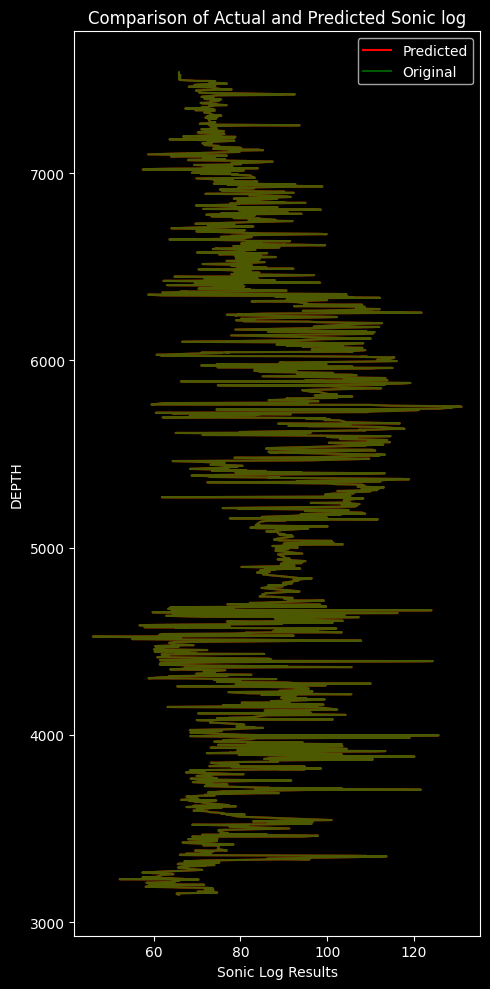

In [179]:
## Normal log

fig = plt.figure(figsize=(5,10))
ax1 = fig.add_subplot(111)
plt.title('Comparison of Actual and Predicted Sonic log')
ax1.plot(df_X_test["Predicted DT"], df_X_test["DEPTH"],  color = 'red', label='Predicted')
ax1.plot(df_X_test["Actual DT"], df_X_test["DEPTH"],  color = 'green', alpha = 0.7, label='Original')
ax1.legend()
plt.xlabel('Sonic Log Results')
plt.ylabel('DEPTH')
plt.tight_layout()
plt.show()



As we see from the plot that the Actual and Predicted results are almost same as we have accuracy of 93%.


In [180]:
## save the Random forest model
import pickle
# Save the model to a file
with open('rf_reg.pkl', 'wb') as file:
    pickle.dump(rf_reg, file)